# A4 - Analisando Módulos
Esse notebook analisa características dos módulos utilizados pelos repositórios selecionados.
Responde às questões de pesquisa: QP6


In [ ]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from src.config.consts import DB_DIR
from src.helpers.h7_analysis_helpers import get_toplevel_modules, display_counts
from src.helpers.h7_analysis_helpers import pastel_colormap, formatar_inteiro, formatar_decimal
%load_ext autoreload

In [1]:
conn = sqlite3.connect(DB_DIR + '/final.sqlite')

# QP5 - Quantos dos projetos fazem uso de arquivos de dependências?

###  Requirement Files

In [2]:
req_files = pd.read_sql_query("SELECT * FROM requirement_files", conn)

In [3]:
req_files.state.value_counts()
print("Repositórios com Arquivos de Dependência:", req_files.repository_id.nunique())

Repositórios com Arquivos de Dependência: 11173


,Number of Rq Files,Number of Repositories,Number of Req Files
0,0,127868,NaN
1,NaN,7770,"(-0.001, 1.0]"
2,NaN,3284,"(1.0, 9.0]"
3,NaN,119,"(9.0, 400.0]"


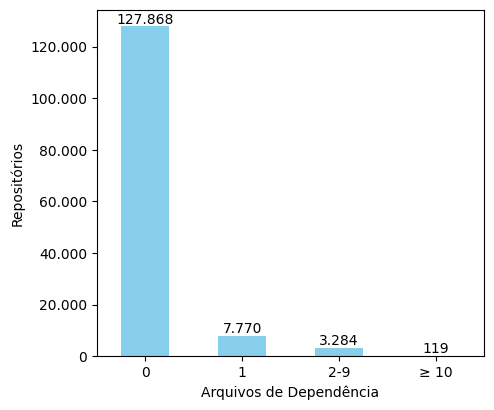

In [4]:
fig1, ax1 = plt.subplots(figsize=(5,4.5))
zeros = 139041 - req_files.repository_id.nunique()
num_req_files_per_repo = req_files.groupby('repository_id').size().reset_index(name='Count')
req_per_repo_count = num_req_files_per_repo.Count.value_counts(bins = [0, 1,9,400]).sort_index()\
    .rename_axis('Number of Req Files').to_frame("Number of Repositories").reset_index(drop=False)
req_per_repo_count = pd.concat([pd.DataFrame({ 'Number of Rq Files': '0', 'Number of Repositories': zeros},
                                             index=[0]), req_per_repo_count]).reset_index(drop=True)
display(req_per_repo_count)
req_per_repo_count.plot.bar(ax=ax1, color='skyblue', xlabel='Arquivos de Dependência',
                            ylabel='Repositórios').get_legend().remove()
for container in ax1.containers:
    ax1.bar_label(container, labels=[formatar_inteiro(valor) for valor in container.datavalues], label_type='edge')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda value, tick: formatar_inteiro(value)))
ax1.set_xticks(ticks=[0, 1, 2, 3], labels=['0', '1', '2-9', '≥ 10'], rotation=0)
fig1.savefig("outputs/a4/requirements_per_repo.png", dpi=500, bbox_inches='tight', format='png');

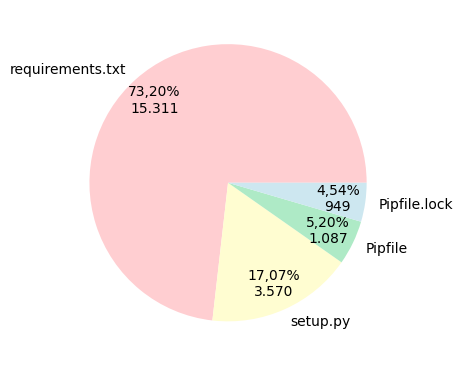

In [6]:
fig2, ax2 = plt.subplots(figsize=(5,4.5))
req_files.reqformat.value_counts().plot.pie(ax=ax2, cmap=pastel_colormap(4), ylabel='', pctdistance=0.8,
                                            autopct=(lambda prct_value: '{}%\n{}'
                      .format(formatar_decimal(prct_value, duas_casas=True),
                              formatar_inteiro(len(req_files) * prct_value / 100))))
fig2.savefig("outputs/a4/requirements_type.png", dpi=500, bbox_inches='tight', format='png');

### Quais são os módulos mais populares em projetos de ciência de dados codificados em Python?
Agora que descobrimos que Python é a linguagem mais usada, seja em arquivos python ou em jupyter notebooks, vamos descobrir quais são os módulos mais usados e como eles são usados.

In [3]:
modules = pd.read_sql_query("SELECT * FROM modules", conn)
print("Total de Módulos em Jupyter Notebooks e Pythn Files: {}".format(modules.any_any_count.sum()))

Total de Módulos em Jupyter Notebooks e Pythn Files: 8030541


In [4]:
python = modules[modules["type"]=='python_file']
notebook = modules[modules["type"]=='notebook']
print("Módulos achados em Python Files: {}({:.2f}%)".format(python.any_any_count.sum(),
      (python.any_any_count.sum()*100/modules.any_any_count.sum())))
print("Módulos achados em Jupyter Notebooks: {}({:.2f}%)".format(notebook.any_any_count.sum(),
                                                             (notebook.any_any_count.sum()*100/modules.any_any_count.sum())))

Módulos achados em Python Files: 3470236(43.21%)
Módulos achados em Jupyter Notebooks: 4560305(56.79%)


#### Most Popular Modules

In [5]:
any_any_modules = get_toplevel_modules(modules, ['any_any'])

Processin column any_any...


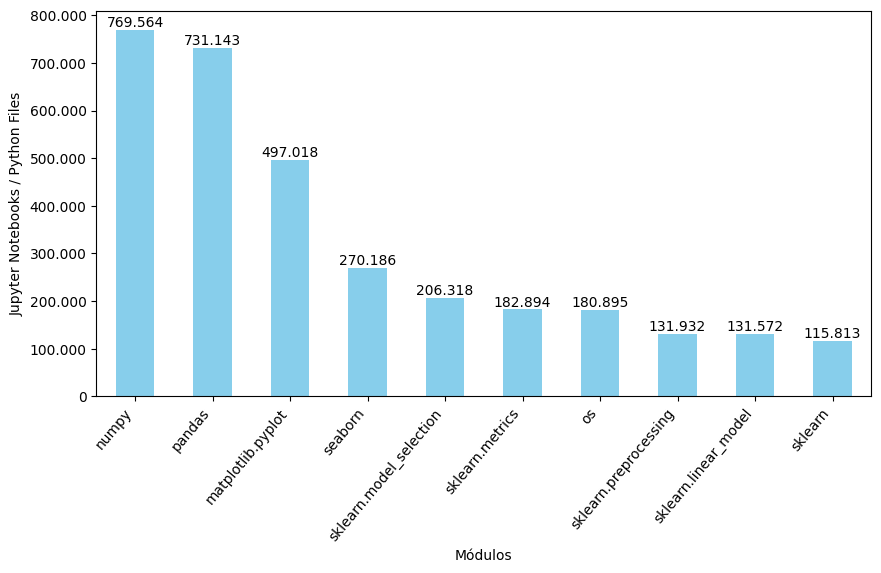

In [8]:
%autoreload 2
fig1, ax1, count1 = display_counts(any_any_modules["any_any"], width=10, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False,color=['skyblue'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha='right')
ax1.legend().set_visible(False)
for container in ax1.containers:
    ax1.bar_label(container, labels=[formatar_inteiro(valor) for valor in container.datavalues], label_type='edge')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda value, tick: formatar_inteiro(value)))

ax1.set_ylabel("Jupyter Notebooks / Python Files")
ax1.set_xlabel("Módulos")
fig1.savefig("outputs/a4/modulos.png", dpi=500, bbox_inches='tight', format='png')

#### Most Common Toplevel Modules
Since modules can be nested in Python, a top level module is the topmost one in a import.

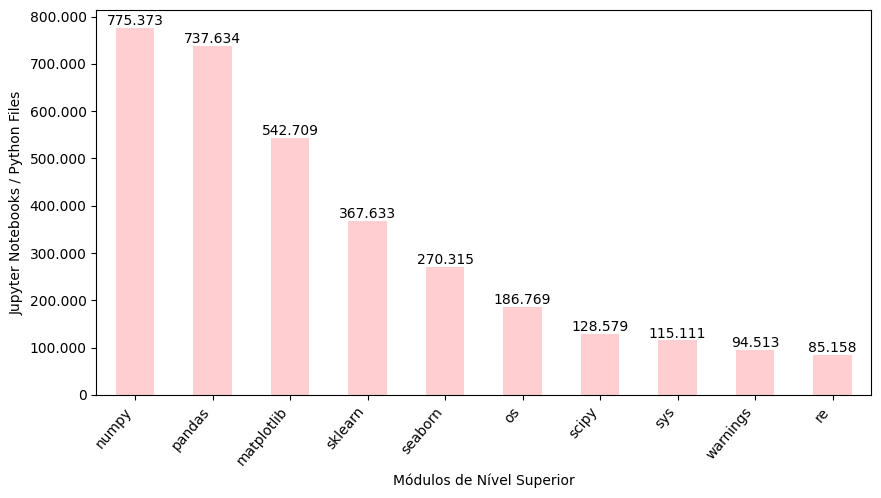

In [9]:
fig2, ax2, count2 = display_counts(any_any_modules["toplevel_any_any"], width=10, show_values=True, plot=False,
                                   cut=slice(None, 10), logy=False, color='#FFCED1')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, ha="right")
ax2.legend().set_visible(False)
for container in ax2.containers:
    ax2.bar_label(container, labels=[formatar_inteiro(valor) for valor in container.datavalues], label_type='edge')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda value, tick: formatar_inteiro(value)))

ax2.set_ylabel("Jupyter Notebooks / Python Files")
ax2.set_xlabel("Módulos de Nível Superior")
fig2.savefig("outputs/a4/modulos_toplevel.png", dpi=500, bbox_inches='tight', format='png')

#### Most Used Import Types
In Python there are two ways to import modules:
- import: `import numpy`
- import_from: `from sklearn import datasets`

In [10]:
display(modules[["any_import_count", "any_import_from_count"]])

,any_import_count,any_import_from_count
0,0,0
1,3,1
2,0,0
3,6,1
4,7,2
...,...,...
1650473,4,9
1650474,6,3
1650475,6,3
1650476,0,0


In [11]:
modules[["any_import_count", "any_import_from_count"]].sum().rename(lambda x: x[:-6])

any_import         4457402
any_import_from    3712068
dtype: int64

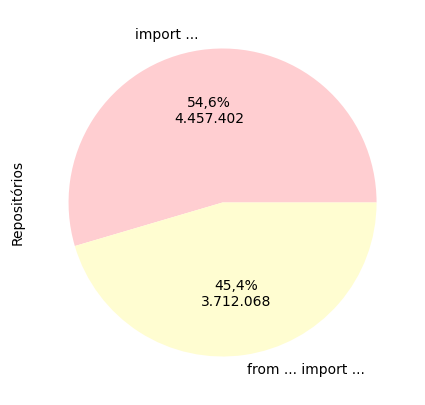

In [11]:
from src.helpers.h7_analysis_helpers import pastel_colormap
%autoreload 2
imports = modules[["any_import_count", "any_import_from_count"]].sum()\
    .rename(lambda x: x[:-6]).rename_axis('Types')\
    .to_frame("Modules").reset_index(drop=False).sort_values(by='Types')

fig3, ax3 = plt.subplots( figsize=(5,5))
imports.plot\
    .pie(ax=ax3, y="Modules", ylabel='Repositórios',
         labels=["import ...", "from ... import ..."],cmap=pastel_colormap(2),
         autopct=(lambda prct_value: '{}%\n{}'
                      .format(formatar_decimal(prct_value),
                              formatar_inteiro((imports["Modules"].sum())*prct_value/100))))\
    .get_legend().remove()
fig3.savefig("outputs/a4/tipos_modulo.png", dpi=500, bbox_inches='tight', format='png')

#### Module Location Type
In Python you can both import local and external modules.

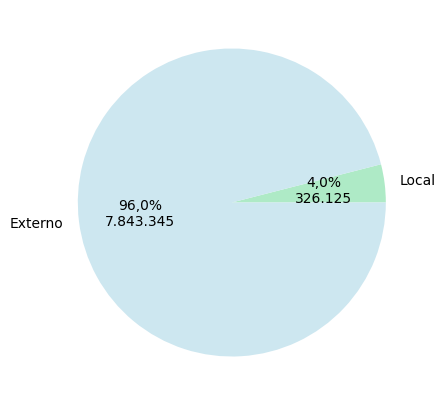

In [12]:
import matplotlib.colors as mcolors
local = modules["local_any_count"].sum()
external = modules["external_any_count"].sum()
location = pd.DataFrame({'Type':['local','external'], 'Modules':[local,external]})

fig4, ax4 = plt.subplots( figsize=(5,5))
location.plot\
    .pie(ax=ax4, y="Modules",
         labels=["Local", "Externo"], ylabel='',cmap=mcolors.ListedColormap(['#AEEAC6', '#CDE7F0']),
         autopct=(lambda prct_value: '{}%\n{}'
                      .format(formatar_decimal(prct_value),
                              formatar_inteiro((imports["Modules"].sum())*prct_value/100))))\
    .get_legend().remove()
fig4.savefig("outputs/a4/local_modulo.png", dpi=500, bbox_inches='tight', format='png')